## zfmlhw010

## 1. 阅读作业
阅读博客文章 《 NFL原理与Hoeffding不等式》（http://blog.csdn.net/baimafujinji/article/details/6475824） 中关于Hoeffding不等式的部分。  
注意第2题也涉及到Hoeffding不等式，为了更好地完成后续题目，请务必认真阅读。

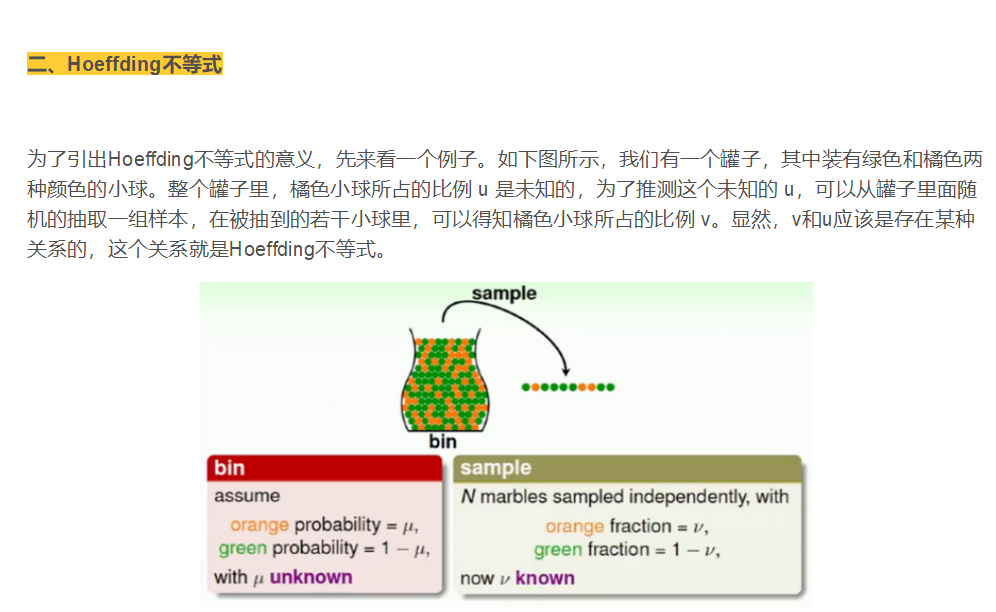

## 2. 证明题

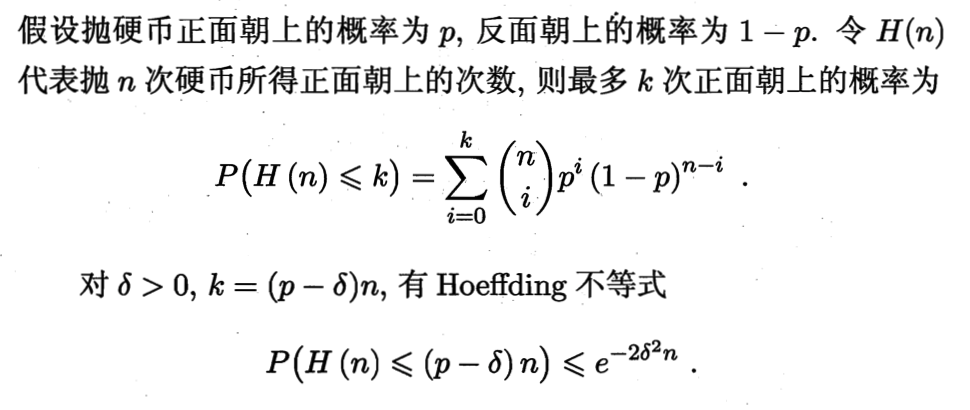

据此证明PPT中第8页的公式： 
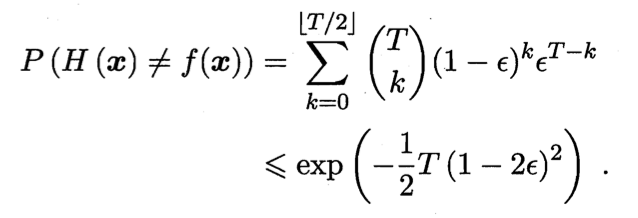

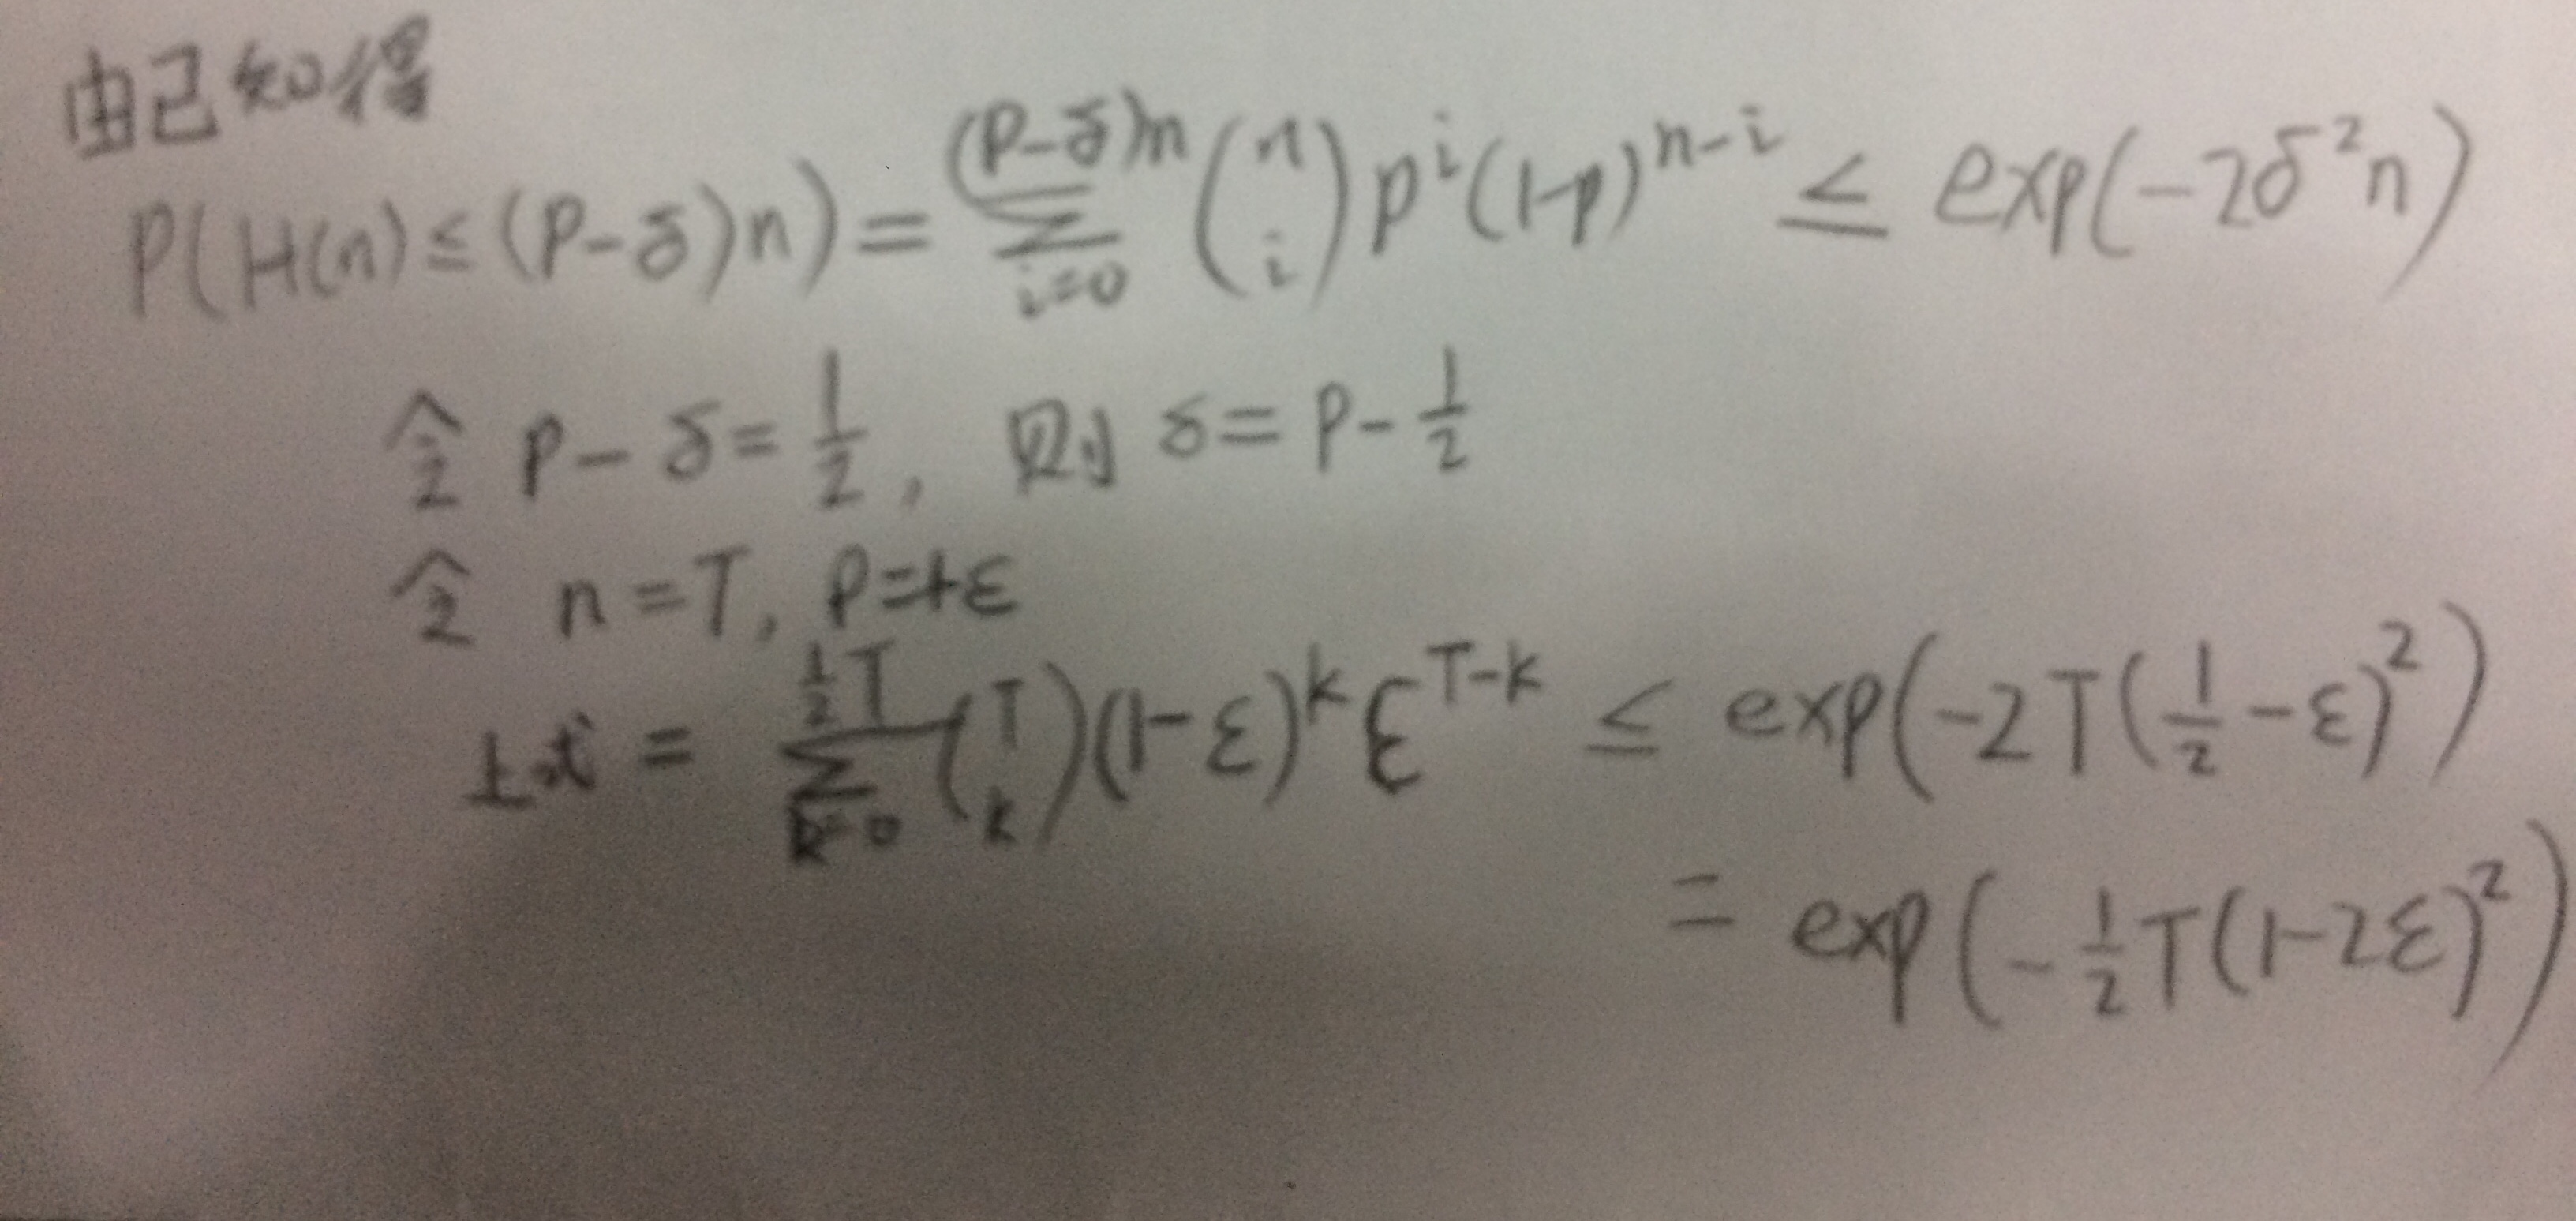

### 3. 实践题
利用集成学习方法实战一下kaggle中的Titanic项目（https://www.kaggle.com/c/titanic）。要求：  
1）你必须使用Adaboost模型；  
2）使用Python或R；  
3）至少引入两种原数据集中未提供的特征（例如Title等，可参考授课内容中相关部分）；  
4）用文字回答的方式描述你使用了哪些特征；  
5）提交完整的（包括引用必要头文件所需的代码）可以执行的代码，代码部分请不要以截图方式提交，因为无法复制粘贴而不能运行的代码将无法判定正确与否。；  
6）截取一张你将预测结果提交到kaggle网站后，系统反馈给你的得分的截图（如果你没有用过kaggle，那么你需要先注册一个账号）。

#### 预测结果提交到kaggle网站后，系统反馈的得分的截图

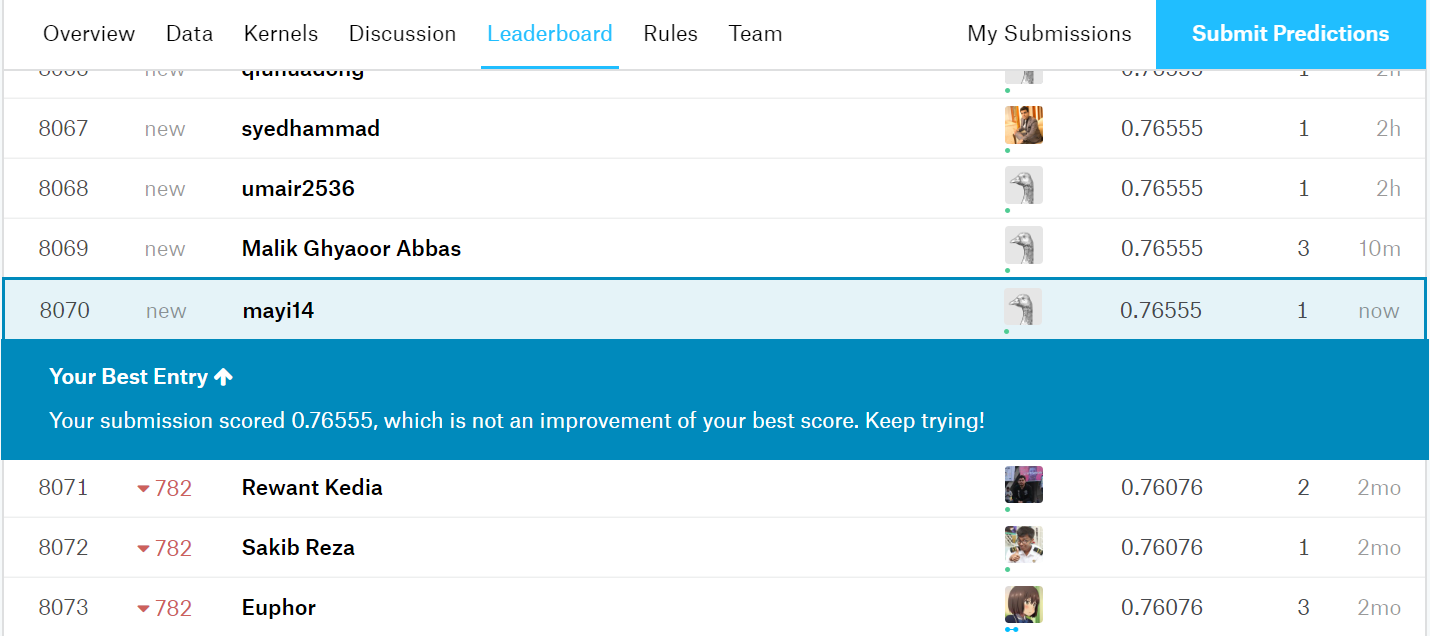

In [65]:
import pandas as pd
from sklearn import ensemble

### 1）读入数据

In [41]:
train = pd.read_csv('titanic/train.csv', index_col=0)
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [42]:
test = pd.read_csv('titanic/test.csv', index_col=0)
test.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [43]:
train.shape, test.shape

((891, 11), (418, 10))

### 2）处理缺失值 & 增加特征

In [44]:
#查看那些列存在缺失值
train.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [45]:
age = train['Age']

#查看Age字段缺失值的数量
age[age.isnull()].shape

(177,)

In [46]:
# 由于缺失字段较多，增加一个特征来记录缺失情况，缺失为1，未缺失为0
train['age_isnull'] = 0
train['age_isnull'][age.isnull()] = 1

test['age_isnull'] = 0
test['age_isnull'][test['Age'].isnull()] = 1

/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
#用train['Age']的平均值填充缺失
age.mean()

29.69911764705882

In [48]:
train['Age'] = train['Age'].fillna(age.mean())
test['Age'] = test['Age'].fillna(age.mean())

In [49]:
cabin = train['Cabin']

#查看cabin字段缺失值的数量
cabin[cabin.isnull()].shape

(687,)

In [50]:
# 由于缺失字段较多，增加一个特征来记录缺失情况，缺失为1，未缺失为0
train['cabin_isnull'] = 0
train['cabin_isnull'][cabin.isnull()] = 1
test['cabin_isnull'] = 0
test['cabin_isnull'][test['Cabin'].isnull()] = 1

/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### 可以看出cabin的第一个字母代表cabin的等级，所以取出第一个字母作为特征

In [52]:
cabin[cabin.isnull()==False].apply(lambda x:x[0][0]).value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

#### 可以看到C最多，但是C,B,D,E的差别并不算很大，所以考虑以一个新值N来填充缺失值

In [55]:
train['Cabin'] = train['Cabin'].fillna('N')

train['Cabin'] = train['Cabin'].apply(lambda x:x[0][0])

In [58]:
test['Cabin'] = test['Cabin'].fillna('N')

test['Cabin'] = test['Cabin'].apply(lambda x:x[0][0])
test['Cabin'].value_counts()

N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [59]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
train['Embarked'][train['Embarked'].isnull()].shape

(2,)

#### 由于Embark的缺失值很少，所以用S填充缺失值

In [61]:
train['Embarked'] = train['Embarked'].fillna('S')

In [62]:
test['Embarked'] = test['Embarked'].fillna('S')

#### 增加名称的称谓特征

In [77]:
train['title'] = train['Name'].apply(lambda x:x[(x.index(',')+2):x.index('.')].strip())
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Capt              1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Don               1
Mme               1
Name: title, dtype: int64

#### 做一些同义替换

In [80]:
train['title'][train['title']=='Ms'] = 'Mrs'
train['title'][train['title']=='Lady'] = 'Mrs'
train['title'][train['title']=='Sir'] = 'Mr'
train['title'].value_counts()

/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can 

Mr              518
Miss            182
Mrs             127
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Jonkheer          1
Mme               1
Capt              1
the Countess      1
Don               1
Name: title, dtype: int64

In [81]:
test['title'] = test['Name'].apply(lambda x:x[(x.index(',')+2):x.index('.')].strip())
test['title'][test['title']=='Ms'] = 'Mrs'
test['title'][test['title']=='Lady'] = 'Mrs'
test['title'][test['title']=='Sir'] = 'Mr'
test['title'].value_counts()

/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd

Mr        240
Miss       78
Mrs        73
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Name: title, dtype: int64

### 到此为止，引入了4个特征，age_isnull用来标记age是否缺失，cabin_isnull用来标记cabin是否缺失，同时选cabin的首字母作为一个新的特征，用title来标记称谓

#### 删除 Name 和 Ticket

In [82]:
del train['Name']
del test['Name']
del train['Ticket']
del test['Ticket']

In [83]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500     N   
2                   1       1  female  38.0      1      0  71.2833     C   
3                   1       3  female  26.0      0      0   7.9250     N   
4                   1       1  female  35.0      1      0  53.1000     C   
5                   0       3    male  35.0      0      0   8.0500     N   

            Embarked  age_isnull  cabin_isnull title  
PassengerId                                           
1                  S           0             1    Mr  
2                  C           0             0   Mrs  
3                  S           0             1  Miss  
4                  S           0             0   Mrs  
5                  S           0             1    Mr

In [84]:
test.head()

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  \
PassengerId                                                               
892               3    male  34.5      0      0   7.8292     N        Q   
893               3  female  47.0      1      0   7.0000     N        S   
894               2    male  62.0      0      0   9.6875     N        Q   
895               3    male  27.0      0      0   8.6625     N        S   
896               3  female  22.0      1      1  12.2875     N        S   

             age_isnull  cabin_isnull title  
PassengerId                                  
892                   0             1    Mr  
893                   0             1   Mrs  
894                   0             1    Mr  
895                   0             1    Mr  
896                   0             1   Mrs

### 2）把分类变量用数字替代

In [88]:
Sex_mapping = dict(zip(train['Sex'].unique(),range(len(train['Sex'].unique()))))
Cabin_mapping = dict(zip(train['Cabin'].unique(),range(len(train['Cabin'].unique()))))
Embarked_mapping = dict(zip(train['Embarked'].unique(),range(len(train['Embarked'].unique()))))
title_mapping = dict(zip(train['title'].unique(),range(len(train['title'].unique()))))

In [89]:
train['Sex'] = train['Sex'].map(Sex_mapping)
train['Cabin'] = train['Cabin'].map(Cabin_mapping)
train['Embarked'] = train['Embarked'].map(Embarked_mapping)
train['title'] = train['title'].map(title_mapping)

In [91]:
test['Sex'] = test['Sex'].map(Sex_mapping)
test['Cabin'] = test['Cabin'].map(Cabin_mapping)
test['Embarked'] = test['Embarked'].map(Embarked_mapping)
test['title'] = test['title'].map(title_mapping)

In [93]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
PassengerId                                                              
1                   0       3    0  22.0      1      0   7.2500      0   
2                   1       1    1  38.0      1      0  71.2833      1   
3                   1       3    1  26.0      0      0   7.9250      0   
4                   1       1    1  35.0      1      0  53.1000      1   
5                   0       3    0  35.0      0      0   8.0500      0   

             Embarked  age_isnull  cabin_isnull  title  
PassengerId                                             
1                   0           0             1      0  
2                   1           0             0      1  
3                   0           0             1      2  
4                   0           0             0      1  
5                   0           0             1      0

### 3）训练模型

In [95]:
clf = ensemble.AdaBoostClassifier()

In [96]:
clf.fit(train.values[:,1:],train.values[:,0])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [97]:
clf.predict(test.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### 预测是报错，提示test中有空值。处理test中的空值

In [98]:
test.isnull().any()

Pclass          False
Sex             False
Age             False
SibSp           False
Parch           False
Fare             True
Cabin           False
Embarked        False
age_isnull      False
cabin_isnull    False
title            True
dtype: bool

In [99]:
title_mapping

{'Mr': 0,
 'Mrs': 1,
 'Miss': 2,
 'Master': 3,
 'Don': 4,
 'Rev': 5,
 'Dr': 6,
 'Mme': 7,
 'Major': 8,
 'Mlle': 9,
 'Col': 10,
 'Capt': 11,
 'the Countess': 12,
 'Jonkheer': 13}

In [100]:
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())
test['title'] = test['title'].fillna(0)

In [103]:
result = pd.DataFrame()

In [104]:
result['PassengerId'] = test.index

In [113]:
result['Survived'] = clf.predict(test.values)

In [106]:
result.head()

PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       1.0

In [114]:
result.to_csv('result.csv')

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end